<a href="https://colab.research.google.com/github/YJJasdasdasd/deeplearning/blob/master/%EC%96%B4%ED%85%90%EC%85%98%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# 단어의 수를 맞춥니다.
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [ ]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습의 조기 중단을 설정합니다.
stop = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
#모델을 실행합니다.
history = model.fit(x_train, y_train, batch_size=40, epochs=100, validation_data=(x_test, y_test), callbacks=[stop])

Epoch 1/100
625/625 [==============================] - 324s 515ms/step - loss: 0.4233 - accuracy: 0.7942 - val_loss: 0.2871 - val_accuracy: 0.8816
Epoch 2/100
625/625 [==============================] - 302s 484ms/step - loss: 0.2488 - accuracy: 0.9013 - val_loss: 0.2801 - val_accuracy: 0.8824
Epoch 3/100
625/625 [==============================] - 300s 481ms/step - loss: 0.1968 - accuracy: 0.9239 - val_loss: 0.2848 - val_accuracy: 0.8836
Epoch 4/100
625/625 [==============================] - 302s 483ms/step - loss: 0.1696 - accuracy: 0.9356 - val_loss: 0.3035 - val_accuracy: 0.8819
Epoch 5/100
625/625 [==============================] - 301s 481ms/step - loss: 0.1407 - accuracy: 0.9470 - val_loss: 0.3588 - val_accuracy: 0.8796


In [ ]:
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 68s 86ms/step - loss: 0.3588 - accuracy: 0.8796

 Test Accuracy: 0.8796


In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

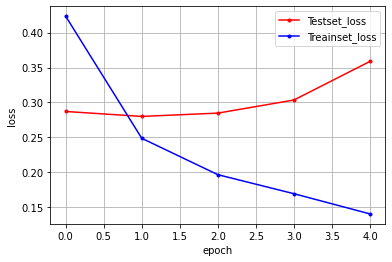

In [ ]:
# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue', label='Treainset_loss')
# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()